# Machine Learning with Matplotlib and Scikit-Learn

In [2]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [7]:


df = pd.read_csv('23_real_estate.csv')

def price_cleaner(price):
    price = price.replace('£', '').replace(',', '')
    try:
        return int(price)
    except:
        return np.nan

def description_cleaner(description):
    return BeautifulSoup(description).get_text()

def title_parser(row):
    try:
        data, row['location'] = row['title'].split(' for sale in ')
        row['bedrooms_title'], row['property_type_title'] = data.split(' bedroom ')
        row['bedrooms_title'] = int(row['bedrooms_title'])
        return row
    except:
        pass

def date_str_cleaner(date_str):
    if pd.isna(date_str):
        return None

    date_str = date_str.replace('Added', '').replace('Reduced', '').replace('on', '')
    date_str = date_str.replace('today', '06/11/2024')
    date_str = date_str.replace('yesterday', '06/10/2024')
    date_str = date_str.strip()
    return date_str


df.descriptionHtml = df.descriptionHtml.apply(description_cleaner)
df.price = df.price.apply(price_cleaner)
df['date'] = df.addedOn.apply(date_str_cleaner)
df['date'] = pd.to_datetime(df.date, format='%d/%m/%Y')

df = df.apply(title_parser, axis=1)

df.rename(columns={
    'descriptionHtml': 'description',
    'propertyType': 'property_type',
    'sizeSqFeetMax': 'sq_feet',
    'listingUpdateReason': 'listing_update_reason',
    'addedOn': 'added_on'
}, inplace=True)



In [8]:
def get_clean_df():
    df = pd.read_csv('23_real_estate.csv')
    df.descriptionHtml = df.descriptionHtml.apply(description_cleaner)
    df.price = df.price.apply(price_cleaner)
    df['date'] = df.addedOn.apply(date_str_cleaner)
    df['date'] = pd.to_datetime(df.date, format='%d/%m/%Y')
    
    df = df.apply(title_parser, axis=1)
    #df = df.query('sizeSqFeetMax < 250000')
    return df.rename(columns={
        'descriptionHtml': 'description',
        'propertyType': 'property_type',
        'sizeSqFeetMax': 'sq_feet',
        'listingUpdateReason': 'listing_update_reason',
        'addedOn': 'added_on'
    })

## Exploratory Analysis with Matplotlib

In [9]:
import matplotlib.pyplot as plt

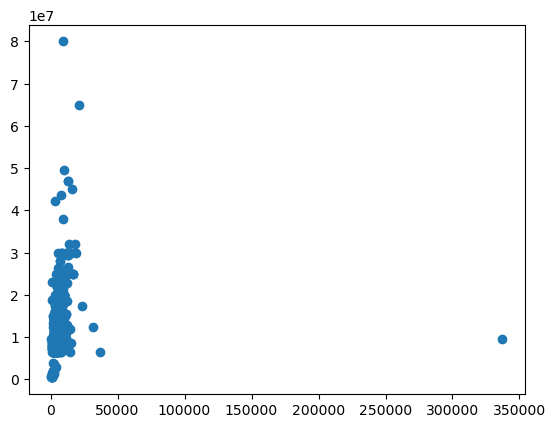

In [10]:
plt.scatter(df['sq_feet'], df['price'])

Text(0.5, 1.0, 'Price vs. Square Feet')

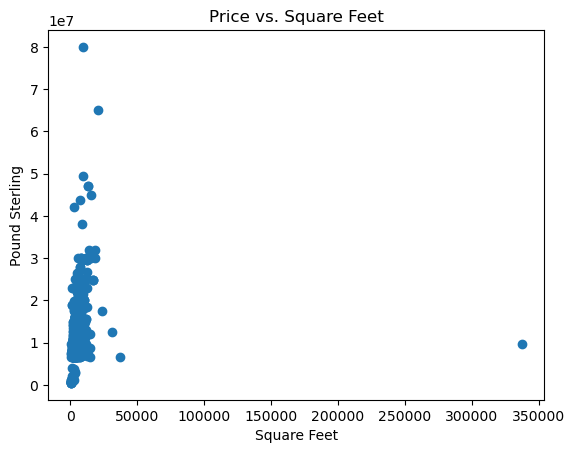

In [11]:
plt.scatter(df['sq_feet'], df['price'])
plt.xlabel('Square Feet')
plt.ylabel('Pound Sterling')
plt.title('Price vs. Square Feet')

In [12]:
df = df.query('sq_feet < 250000')

In [14]:
def get_clean_df():
    df = pd.read_csv('23_real_estate.csv')
    df.descriptionHtml = df.descriptionHtml.apply(description_cleaner)
    df.price = df.price.apply(price_cleaner)
    df['date'] = df.addedOn.apply(date_str_cleaner)
    df['date'] = pd.to_datetime(df.date, format='%d/%m/%Y')
    
    df = df.apply(title_parser, axis=1)
    # remove outlier
    df = df.query('sizeSqFeetMax < 250000')
    return df.rename(columns={
        'descriptionHtml': 'description',
        'propertyType': 'property_type',
        'sizeSqFeetMax': 'sq_feet',
        'listingUpdateReason': 'listing_update_reason',
        'addedOn': 'added_on'
    })


Text(0.5, 1.0, 'Price vs. Square Feet')

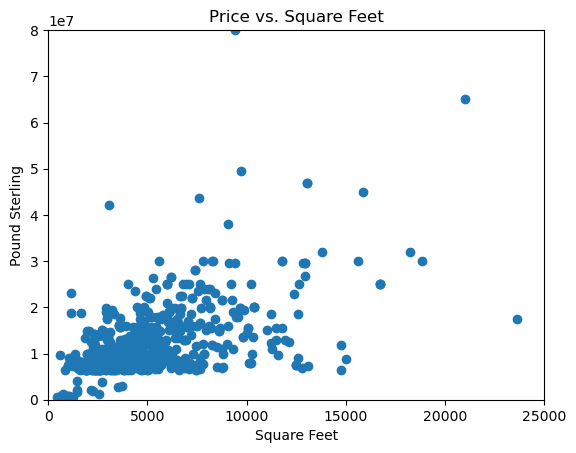

In [16]:
df = get_clean_df()
plt.axis([0, 25000, 0, 80000000])
plt.scatter(df['sq_feet'], df['price'])
plt.xlabel('Square Feet')
plt.ylabel('Pound Sterling')
plt.title('Price vs. Square Feet')

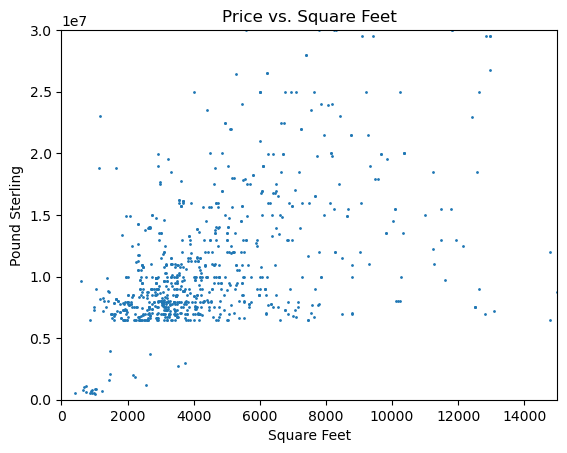

In [18]:
df = get_clean_df()
plt.axis([0, 15000, 0, 30000000])
plt.xlabel('Square Feet')
plt.ylabel('Pound Sterling')
plt.title('Price vs. Square Feet')
plt.scatter(df['sq_feet'], df['price'], s=1)

In [8]:
property_types = df.groupby('property_type').agg({
    'title': 'count'
}).sort_values(by='title', ascending=False)
property_types.head(100)

,title
property_type,
Apartment,214
Terraced,141
Detached,119
Flat,112
House,85
Penthouse,79
Semi-Detached,32
Town House,27
End of Terrace,16


In [20]:
property_types = df.groupby('property_type').agg({
    'title': 'count'
}).sort_values(by='title', ascending=False)

popular_property_types = list(property_types.index[0:6])
df_ppt = df[df['property_type'].isin(popular_property_types)]
len(df_ppt)

750

In [22]:
from matplotlib import colormaps

colormaps['tab10'].colors

((0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529))

In [23]:
colors = df_ppt.property_type.apply(
    lambda pt: colormaps['tab10'].colors[popular_property_types.index(pt)]
)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


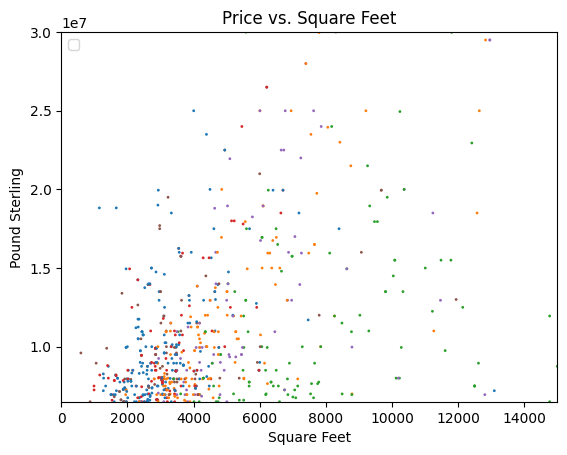

In [14]:
from matplotlib import colormaps

plt.axis([0, 15000, 0, 30000000])
plt.xlabel('Square Feet')
plt.ylabel('Pound Sterling')
plt.title('Price vs. Square Feet')

plt.scatter(
    df_ppt['sq_feet'],
    df_ppt['price'],
    s=1,
    c=colors,
)


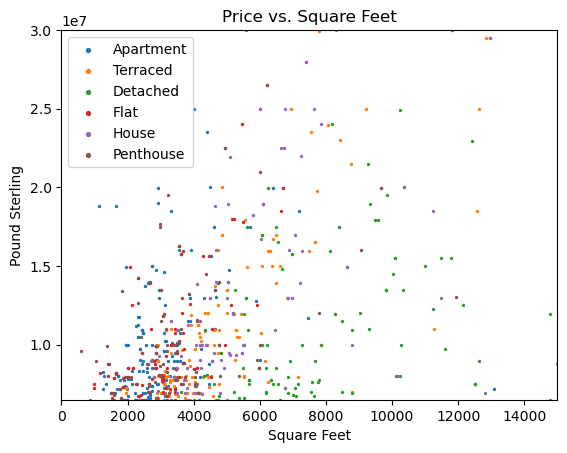

In [26]:

vis_colors = colormaps['tab10'].colors[0:len(popular_property_types)]
for pt, color in zip(popular_property_types, vis_colors):
    df_pt = df.query(f'property_type=="{pt}"')
    plt.scatter(
        df_pt['sq_feet'],
        df_pt['price'],
        s=2,
        color=color,
        label=pt
    )
plt.axis([0, 15000, 6500000, 30000000])
plt.xlabel('Square Feet')
plt.ylabel('Pound Sterling')
plt.title('Price vs. Square Feet')
plt.legend(markerscale=2, loc='upper left')

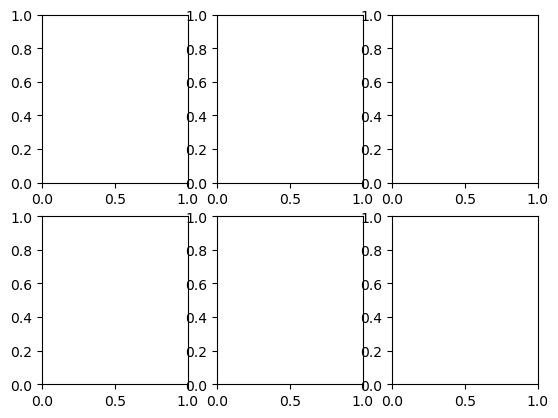

In [27]:
fig, ax = plt.subplots(2, 3)

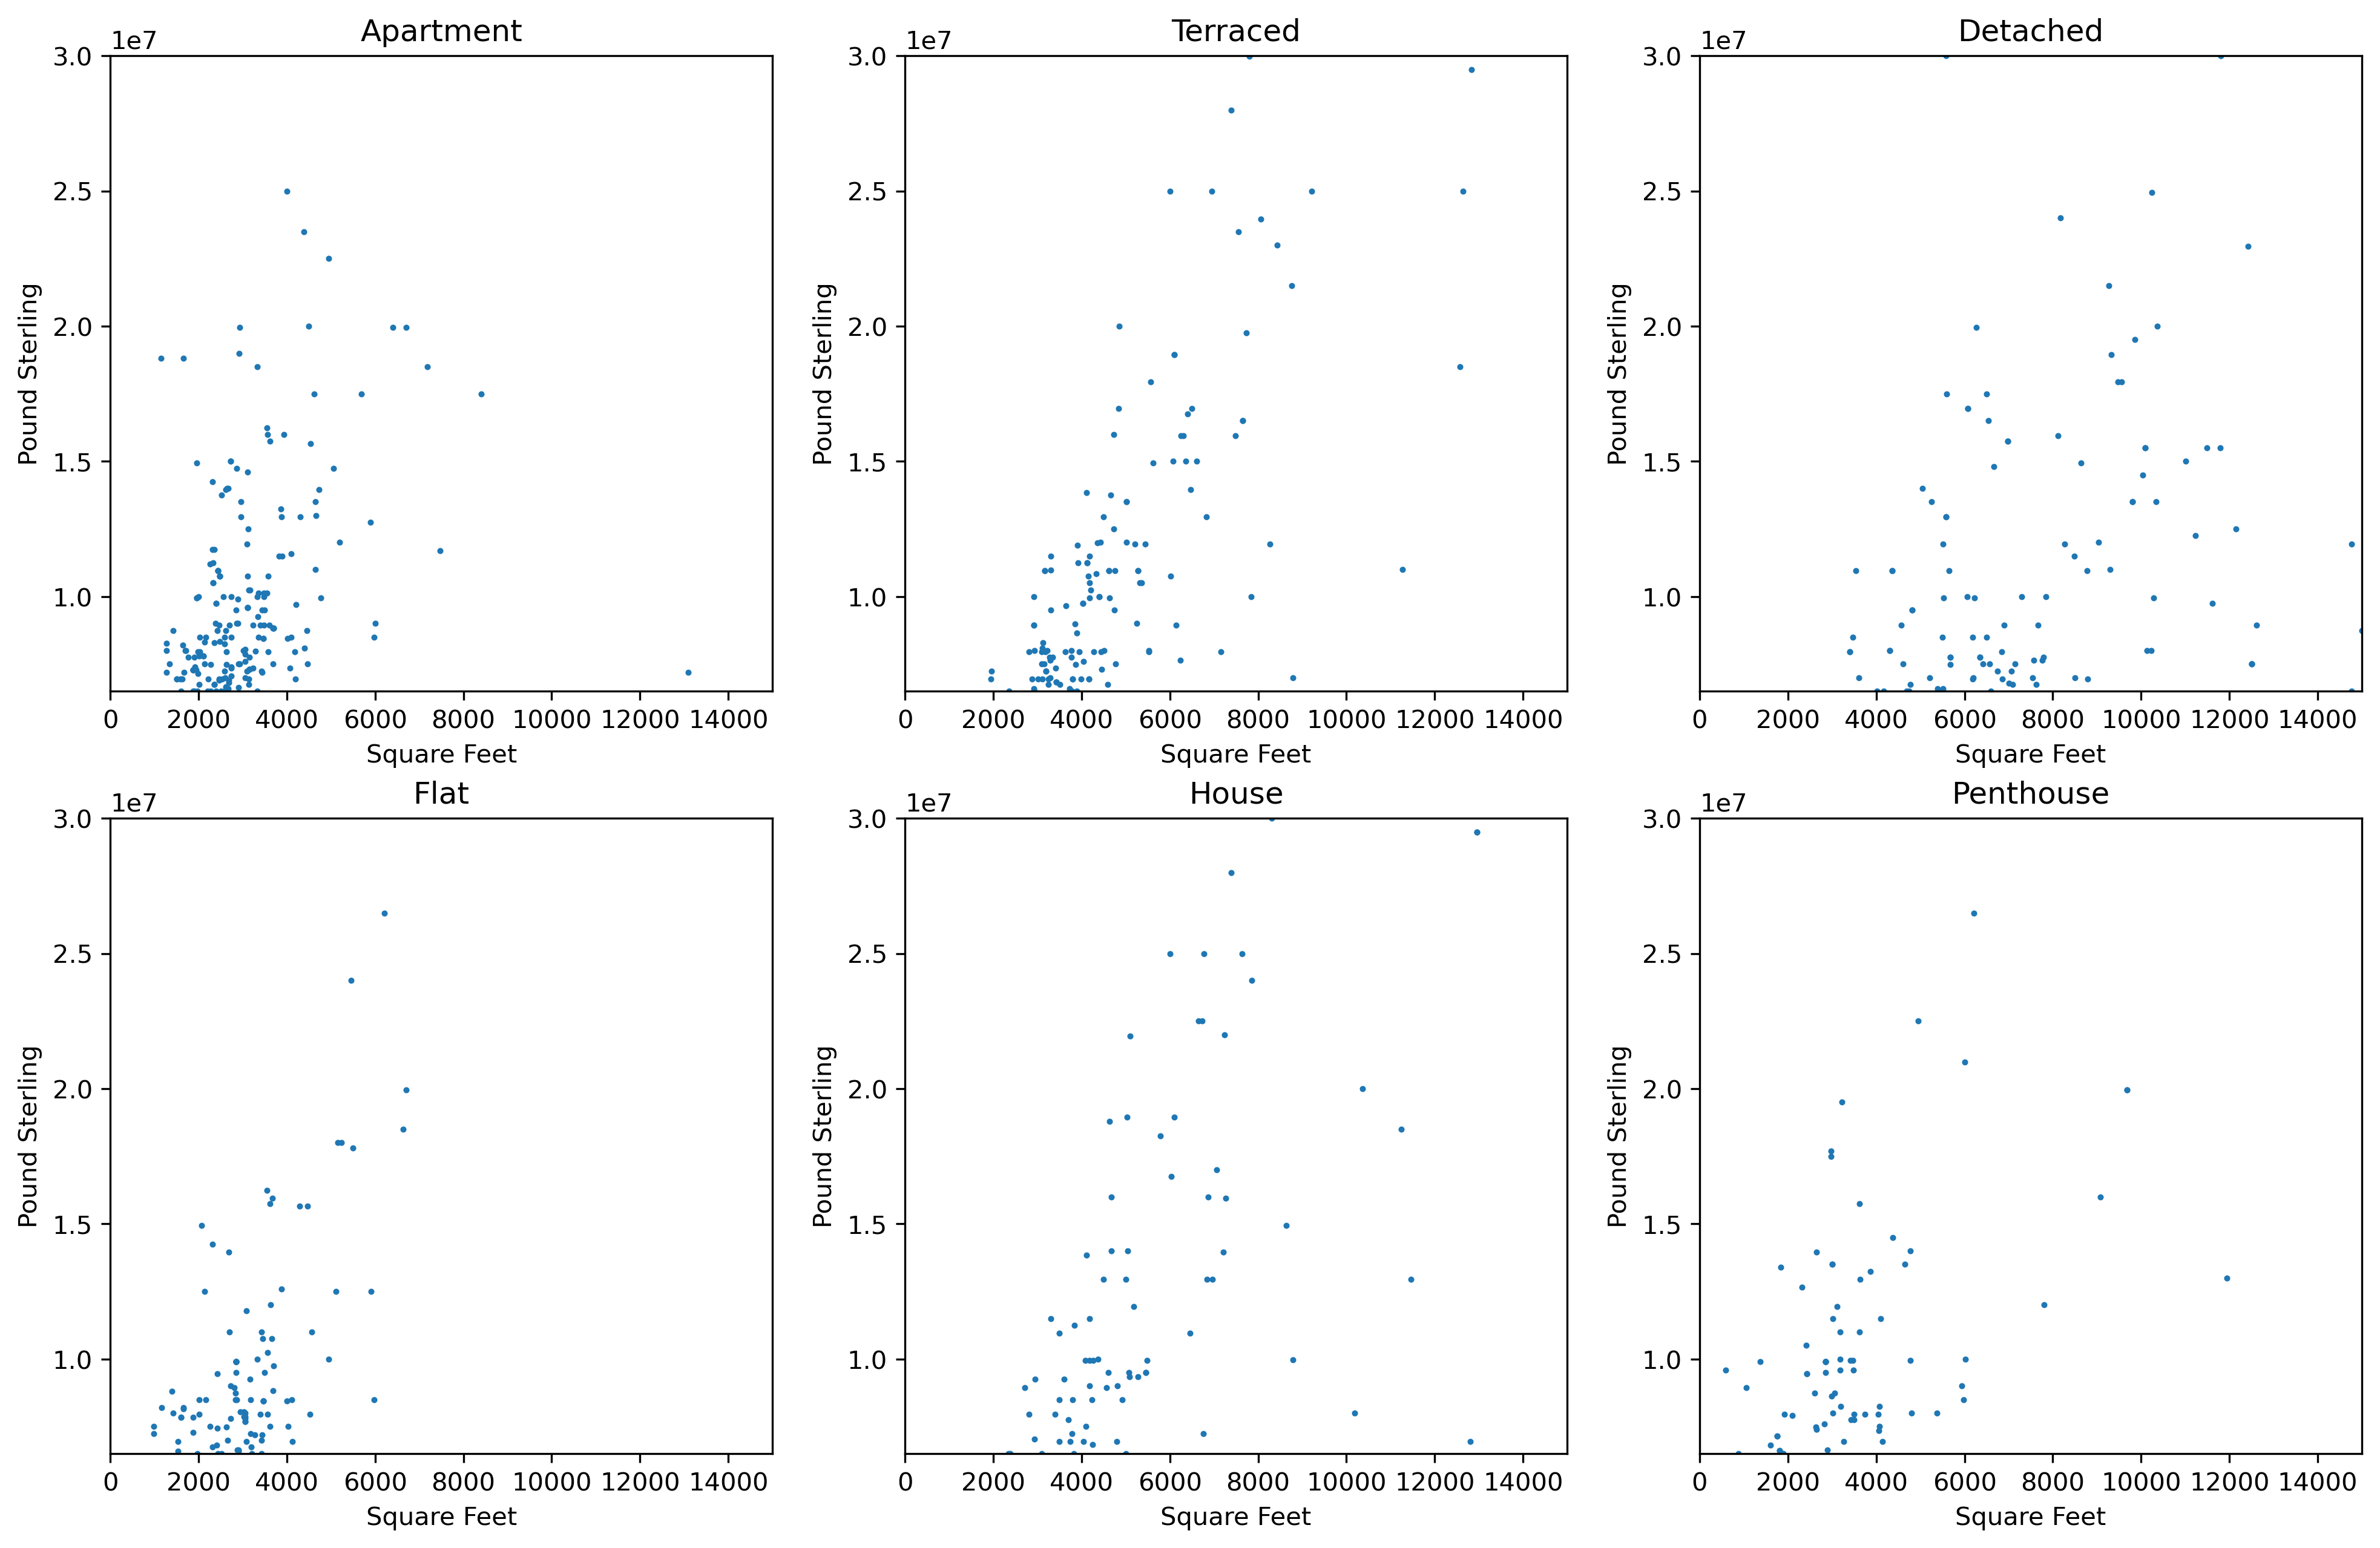

In [28]:
fig, ax = plt.subplots(2, 3, figsize=(16,10), dpi=300)

ax_listing = [ax[0][0], ax[0][1], ax[0][2], ax[1][0], ax[1][1], ax[1][2]]

for pt, ax_item in zip(popular_property_types, ax_listing):
    df_pt = df.query(f'property_type=="{pt}"')
    ax_item.scatter(
        df_pt['sq_feet'],
        df_pt['price'],
        s=2,
        label=pt
    )
    ax_item.axis([0, 15000, 6500000, 30000000])
    ax_item.set_title(pt)
    ax_item.set_xlabel('Square Feet')
    ax_item.set_ylabel('Pound Sterling')


In [29]:
fig.savefig('london_realestate.png')

In [46]:
df = get_clean_df()
df_by_month = df.groupby(pd.PeriodIndex(df['date'], freq='M')).agg({
    'price': 'mean',
    'title': 'count'
})
df_by_month.reset_index(inplace=True)
df_by_month.date = df_by_month.date.apply(lambda d: d.to_timestamp())
df_by_month.rename(columns={'title': 'count'}, inplace=True)
df_by_month.head()

,date,price,count
0,2019-08-01,11795000.0,1
1,2020-03-01,11000000.0,1
2,2022-01-01,8597500.0,2
3,2022-02-01,17000000.0,3
4,2022-03-01,6900000.0,1


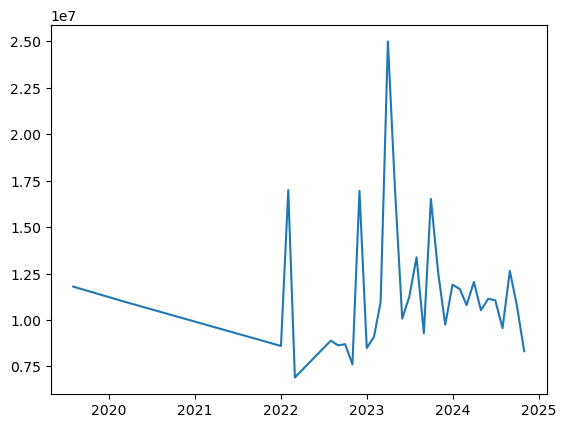

In [47]:
plt.plot(df_by_month.date, df_by_month['price'])

In [49]:
df = get_clean_df()
df.query('date < 20220101')


,added_on,title,description,property_type,sq_feet,bedrooms,bathrooms,listing_update_reason,price,date,location,bedrooms_title,property_type_title
313,15/03/2020,4 bedroom penthouse for sale in Bolsover Stree...,Arguably the finest penthouse in Fitzrovia wit...,Penthouse,3176.0,4.0,4.0,new,11000000.0,2020-03-15,"Bolsover Street, Fitzrovia, London, W1W",4.0,penthouse
351,01/08/2019,"3 bedroom flat for sale in Montrose Place, Bel...",An exceptional three bedroom lateral apartment...,Flat,3084.0,3.0,3.0,new,11795000.0,2019-08-01,"Montrose Place, Belgravia, London, SW1X",3.0,flat


<BarContainer object of 30 artists>

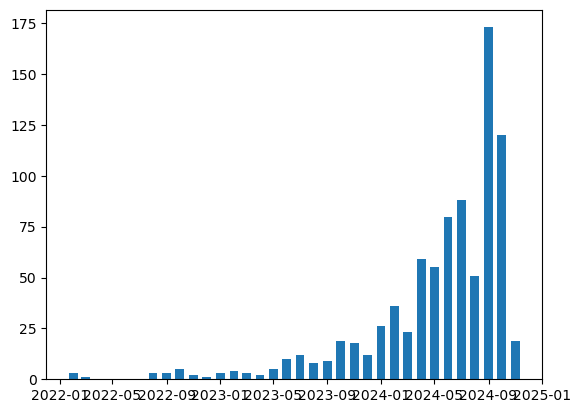

In [50]:
df_by_month = df_by_month.query('date > 20220101')
plt.bar(df_by_month.date, df_by_month['count'], width=20)

## Building Supervised Models with Scikit-Learn

In [51]:
df_train = df.query('property_type == "Terraced" and price.notna()')
df_train = df_train.query('sq_feet.notna() and bathrooms.notna()')


In [52]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(
    df_train[['sq_feet', 'bedrooms', 'bathrooms']],
    df_train['price']
)


In [53]:
model.predict([[1450, 3, 2]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3747218.93990251])

In [21]:
type(LinearRegression)

abc.ABCMeta

In [57]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='newton-cholesky').fit(
    df_train[['sq_feet', 'bedrooms', 'bathrooms']],
    df_train['price']
)

model.predict([[1450, 3, 2]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([6950000.])

In [58]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor().fit(
    df_train[['sq_feet', 'bedrooms', 'bathrooms']],
    df_train['price']
)

model.predict([[1450, 3, 2]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


array([5120.06173547])

In [59]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000).fit(
    df_train[['sq_feet', 'bedrooms', 'bathrooms']],
    df_train['price']
)

model.predict([[1450, 3, 2]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([6950000.])

In [60]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='newton-cholesky').fit(
    df_train[['sq_feet', 'bedrooms', 'bathrooms']],
    df_train['price']
)

model.predict([[1450, 3, 2]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([6950000.])

In [61]:
df_ppt[['property_type']].head()

,property_type
0,House
1,House
2,Terraced
3,Detached
4,Detached


In [62]:
pd.get_dummies(df_ppt['property_type']).head()

,Apartment,Detached,Flat,House,Penthouse,Terraced
0,False,False,False,True,False,False
1,False,False,False,True,False,False
2,False,False,False,False,False,True
3,False,True,False,False,False,False
4,False,True,False,False,False,False


In [64]:
df_train = get_clean_df()
df_train = df[df['property_type'].isin(popular_property_types)]
df_train = df_train.query('price.notna() and sq_feet.notna()')
df_train = df_train.query('bedrooms.notna() and bathrooms.notna()')
df_train = df_train.join(pd.get_dummies(df_train.property_type))

In [68]:
from sklearn.svm import SVR

input_cols = [
    'sq_feet',
    'bedrooms',
    'bathrooms',
    'Apartment',
    'Detached',
    'Flat',
    'House',
    'Penthouse',
    'Terraced'
]
model = SVR().fit(df_train[input_cols], df_train['price'])
model.predict([[1400, 3, 2, True, False, False, False, False, False]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([8999920.18084721])

In [196]:
df_train = get_clean_df().query('property_type.notna()')
df_train = df[df['property_type'].isin(popular_property_types)]
df_train = df_train.query('price.notna() and sq_feet.notna()')
df_train = df_train.query('bedrooms.notna() and bathrooms.notna()')

In [69]:
df_train = get_clean_df()
df_train = df[df['property_type'].isin(popular_property_types)]
df_train.fillna(0, inplace=True)


/var/folders/y6/jnf4yrtx1pg3y9tqb8fmhnrr0000gp/T/ipykernel_8388/1758086124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.fillna(0, inplace=True)


In [70]:
from sklearn.neighbors import KNeighborsClassifier

input_cols = ['bedrooms', 'bathrooms', 'price', 'sq_feet']
model = KNeighborsClassifier().fit(
    df_train[input_cols], df_train['property_type']
)

In [71]:
len(df_train)

750

In [72]:
model.predict([[3, 2, 5000000, 1400]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Apartment'], dtype=object)

In [73]:
model.predict([[3, 2, 5000000, 1400]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Apartment'], dtype=object)

In [74]:
model.predict(df_train[input_cols])

array(['Detached', 'House', 'House', 'Detached', 'Detached', 'House',
       'Terraced', 'Terraced', 'House', 'House', 'Terraced', 'House',
       'House', 'House', 'Terraced', 'House', 'Terraced', 'House',
       'Detached', 'Detached', 'Detached', 'Detached', 'Detached',
       'Detached', 'Detached', 'Detached', 'Terraced', 'Detached',
       'House', 'House', 'House', 'Terraced', 'Terraced', 'House',
       'Apartment', 'Flat', 'Apartment', 'Apartment', 'Apartment',
       'Apartment', 'Apartment', 'Apartment', 'House', 'Apartment',
       'House', 'House', 'House', 'House', 'House', 'Penthouse', 'House',
       'Detached', 'Apartment', 'House', 'House', 'House', 'House',
       'House', 'House', 'House', 'House', 'Terraced', 'Terraced',
       'Terraced', 'Terraced', 'Terraced', 'Apartment', 'Detached',
       'Detached', 'Apartment', 'Apartment', 'Apartment', 'Apartment',
       'Apartment', 'Apartment', 'Detached', 'Apartment', 'Apartment',
       'Apartment', 'Terraced', 'House

## Evaluating Classification Models with Scikit-Learn

In [75]:
df = get_clean_df()
df = df.query('added_on.notna()')
df['is_reduced'] = df['added_on'].apply(lambda s:'Reduced' in s)

In [690]:
df = get_clean_df()
df = df.query('added_on.notna()')
df['is_reduced'] = df['added_on'].apply(lambda s:'Reduced' in s)

df.fillna(0, inplace=True)

In [76]:
def get_balanced_samples(df, col_name):
    pos = df.query(f'{col_name} == True')
    neg = df.query(f'{col_name} == False')
    if len(pos) > len(neg):
        pos = pos.sample(len(neg))
    else:
        neg = neg.sample(len(pos))
    return pos, neg

df_pos, df_neg = get_balanced_samples(df, 'is_reduced')


In [77]:
df = pd.concat([df_pos, df_neg])

In [79]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2)

In [694]:
len(df_train)

478

In [82]:
from sklearn.tree import DecisionTreeClassifier

input_cols = ['bedrooms', 'bathrooms', 'price', 'sq_feet']

dtc = DecisionTreeClassifier().fit(
    df_train[input_cols], df_train['is_reduced']
)

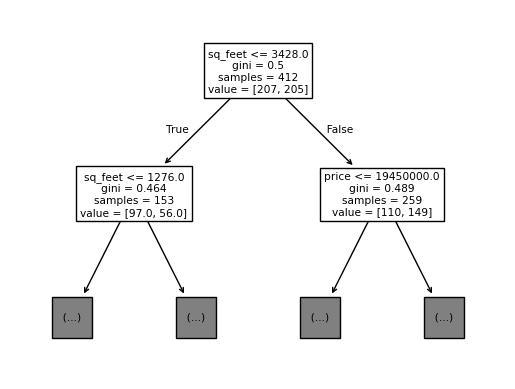

In [83]:
from sklearn import tree
import matplotlib.pyplot as plt
tree.plot_tree(dtc, max_depth=1, feature_names=input_cols)
plt.show()

In [85]:
dtc.score(df_test[input_cols], df_test['is_reduced'])

0.6634615384615384

In [84]:
dtc.score(df_train[input_cols], df_train['is_reduced'])

0.9902912621359223

In [90]:
from sklearn.tree import DecisionTreeClassifier
df_train, df_test = train_test_split(df, test_size=0.2)
input_cols = ['bedrooms', 'bathrooms', 'price', 'sq_feet']

dtc = DecisionTreeClassifier(max_depth=3).fit(
    df_train[input_cols], df_train['is_reduced']
)

dtc.score(df_test[input_cols], df_test['is_reduced'])

0.5576923076923077

In [91]:
dtc.score(df_train[input_cols], df_train['is_reduced'])

0.6286407766990292

In [92]:
def measure_performance(classifier, df, n):
    test_scores = []
    train_scores = []
    for _ in range(n):
        df_train, df_test = train_test_split(df, test_size=0.2)
        classifier.fit(df_train[input_cols], df_train['is_reduced'])
        test_scores.append(
            classifier.score(df_test[input_cols], df_test['is_reduced'])
        )
        train_scores.append(
            classifier.score(df_train[input_cols], df_train['is_reduced'])
        )
    print(f'    test mean: {np.mean(test_scores)}')
    print(f'    train mean: {np.mean(train_scores)}')
    print(f'    test variance: {np.var(test_scores)}')

In [97]:
print('Unlimited Max Depth')
measure_performance(DecisionTreeClassifier(), df, 100)
print('Max Depth 3')
measure_performance(DecisionTreeClassifier(max_depth=3), df, 100)
print('Max Depth 4')
measure_performance(DecisionTreeClassifier(max_depth=4), df, 100)

Unlimited Max Depth
    test mean: 0.5892307692307692
    train mean: 0.9921116504854369
    test variance: 0.002097041420118343
Max Depth 3
    test mean: 0.5574999999999999
    train mean: 0.6284951456310679
    test variance: 0.001484800295857988
Max Depth 4
    test mean: 0.55375
    train mean: 0.6542233009708738
    test variance: 0.002400323594674556
